# 特征有效性分析

- 先验概率：不考虑特征，只考虑结果
- 后验概率：（特征相对于某个标签的后验概率）即条件概率

## 不确定性的减少可以作为特征有效性分析的一个指标

## 确定性的增加可以作为特征有效性分析的一个指标

# 贝叶斯与逻辑回归比较

权重不同，原因：

    引入了两个独立条件假设，贝叶斯方法直接跳过了逻辑回归中反复迭代用梯度下降法才能求出的权重
    附加假设：可以直接通过统计结果求权重，而不必用梯度下降法
    在某种假定下，可以证明：与朴素贝叶斯分类方法一样，许多神经网络和曲线拟合算分输出最大的后验假定

样本数量不够，特征数量过多，容易引起过拟合

# 处理类别特征

## 类别型变量特征

In [3]:
# create a dataframe with an integer feature and a categorical string feature
import pandas as pd

demo_df = pd.DataFrame({"Integer Feature": [0, 1, 2, 1], "Categorical Feature": ["socks", "fox", "socks", "box"]})
demo_df

,Categorical Feature,Integer Feature
0,socks,0
1,fox,1
2,socks,2
3,box,1


get_dummies对“整数特征”无变化，对类别特征进行one-hot编码

In [4]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0.0,0.0,1.0
1,1,0.0,1.0,0.0
2,2,0.0,0.0,1.0
3,1,1.0,0.0,0.0


将“整形特征”变为“字符型类别”进行one-hot编码

In [5]:
demo_df["Integer Feature"] = demo_df["Integer Feature"].astype(str)
pd.get_dummies(demo_df)

,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks,Integer Feature_0,Integer Feature_1,Integer Feature_2
0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0


## 连续型变量特征

In [26]:
import numpy as np

def make_wave(n_samples=100):
    rnd=np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)   #np.random.uniform生成100个随机数,符合U(-3,3)上的均匀分布
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    #生成100个随机数,符合N(0,1)正态分布
    return x.reshape(-1, 1), y   #返回关于x的列向量

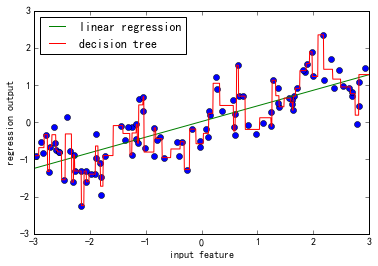

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = make_wave(n_samples=100)
plt.plot(X[:, 0], y, 'o')
line = np.linspace(-3, 3, 1000)[:-1].reshape(-1, 1)
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

plt.ylabel("regression output")
plt.xlabel("input feature")

plt.legend(loc="best")

plt.show()

### 分桶

In [27]:
import numpy as np

# np.set_printoptions设置数组答应信息， precision设置输出浮点精度
np.set_printoptions(precision=2)

# 构造连续特征切割分桶边界
bins = np.linspace(-3, 3, 11)
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [28]:
# np.digitize返回参数数组对应分桶的索引
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points:
 [[-0.75]
 [ 2.7 ]
 [ 1.39]
 [ 0.59]
 [-2.06]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


### one-hot

In [29]:
from sklearn.preprocessing import OneHotEncoder
# sparse参数设置为True，使输出为系数矩阵形式，否则为数组
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
#根据索引数组，one-hot成稀疏矩阵
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


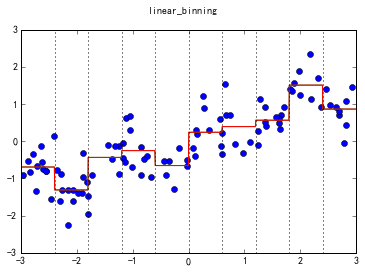

In [34]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

plt.plot(X[:, 0], y, 'o')

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="linear regression binned")

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="decisiontree regression binned")

for bin in bins:
    # 分段考虑，线性回归
    plt.plot([bin, bin], [-3, 3], ":", c="k")

plt.plot(loc="best")
plt.suptitle("linear_binning")
plt.show()